# Snips pour Explorer un Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_excel('../Data/covid_dataset.xlsx', engine='openpyxl')

# Analyse de Forme

## Visualiser entièrement le Dataset
`pd.set_option()` Pour visualiser en entié les grands Dataset

In [9]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [10]:
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Copier son Dataset
Pour préserver son dataset originel on commence toujours par en faire une copie

In [5]:
df = data.copy()

## Types de variables 
Quels types de variables compose notre Dataset, Catégoriels, Caractères, Numériques, Continues, Discrètes

- Compter le types de variables par genres

In [6]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

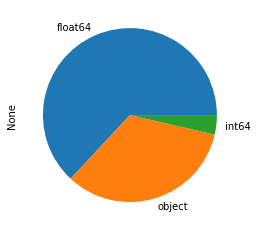

In [7]:
df.dtypes.value_counts().plot.pie()

## Valeurs Manquantes NaN

### Visualiser le Dataset via les NaN

- Affiche tout notre Dataset avec valeurs noir pour les *NaN*

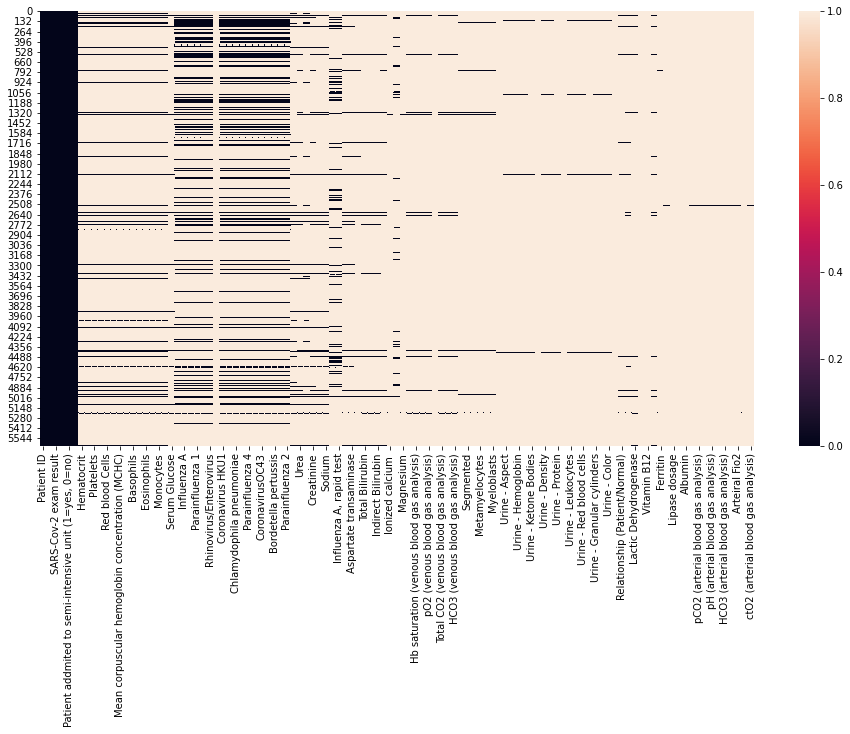

In [14]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.isna())

**Analyse du tableau** ci-dessus:  

Ligne noir continue sur plusieurs variables peut vouloir dire :
- Possiblité pour nous de faire facilement du `dropna()` sur des lignes, bien.
- Certainement des variables qui ont des relations pour celles qui présentes les même valeurs manquantes




###  Mesurer le nombre de Nan par colonnes

- Pourcentage de Nan par colonnes, trié du plus grand au plus petit

In [18]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

Urine - Sugar                                            1.000000
Mycoplasma pneumoniae                                    1.000000
Partial thromboplastin time (PTT)                        1.000000
Prothrombin time (PT), Activity                          1.000000
D-Dimer                                                  1.000000
Fio2 (venous blood gas analysis)                         0.999823
Urine - Nitrite                                          0.999823
Vitamin B12                                              0.999468
Lipase dosage                                            0.998583
Albumin                                                  0.997697
Phosphor                                                 0.996456
Arteiral Fio2                                            0.996456
Ferritin                                                 0.995925
Arterial Lactic Acid                                     0.995216
ctO2 (arterial blood gas analysis)                       0.995216
Hb saturat

Exemple de choses à faire:
- Trier les varb par groupes si possible
- Èliminer les varb avec le plus de NaN

***

# Analyse de fond

## Suppression des colonnes inutiles

- Selection des colonnes qui contiennent uniqument moins de 90% de *NaN*

In [21]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]

- Supprime la colonne qui comporte le numéro du patient

In [35]:
df = df.drop(columns='Patient ID')

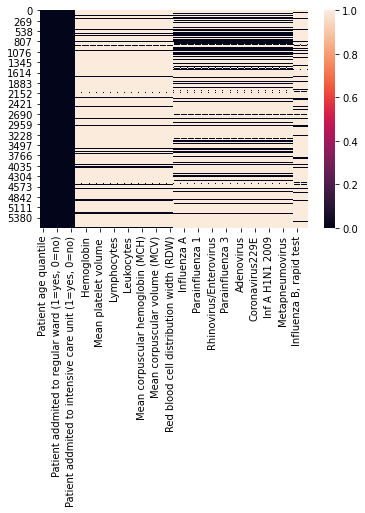

In [36]:
sns.heatmap(df.isna())

## La colonne *Target*

- Affiche le pourcentage de la répartitions des données négatives et positives dans la colonne Target

In [39]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)
# normalize=True, donne le pourcentage

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

- Classe désiquilibré seulement 10% de cas positifs

## Analyse Variables Continues
Analyse des variables numériques continues avec des **Histogrames** pour regarder leurs distributions

In [45]:
df.select_dtypes('float').columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

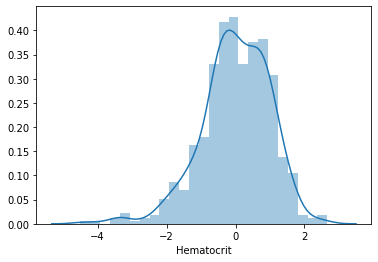

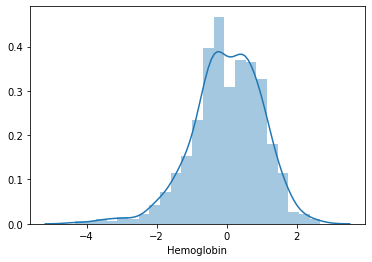

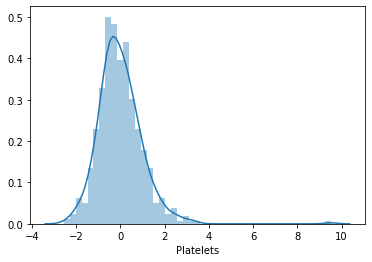

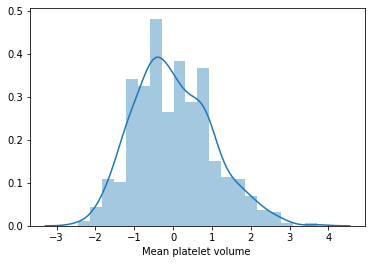

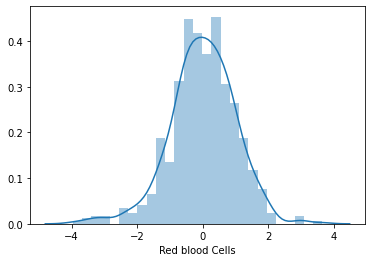

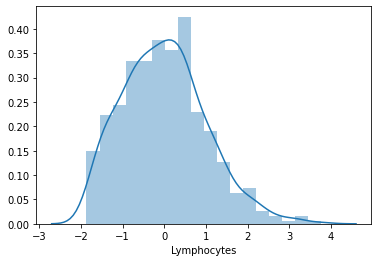

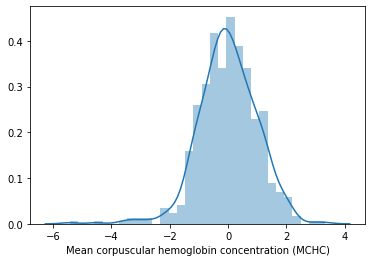

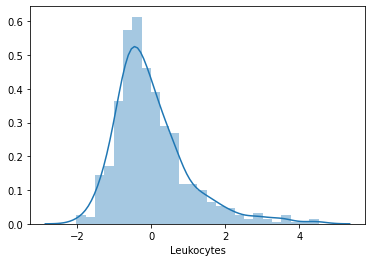

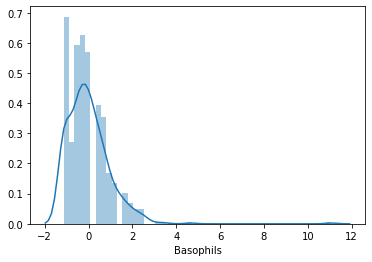

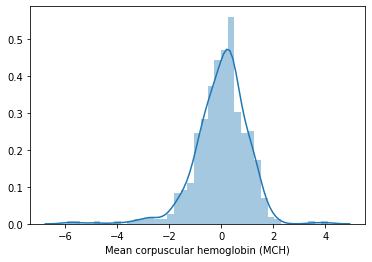

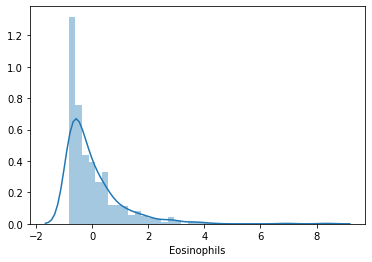

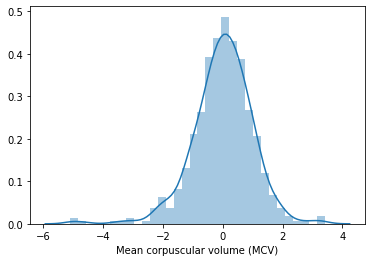

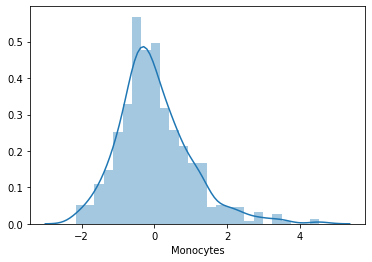

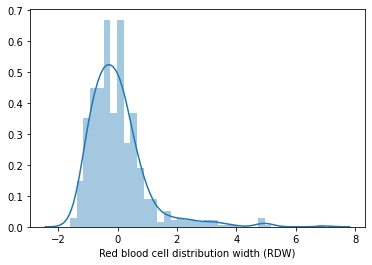

In [46]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

**Analyse des ces Histogrammes**
- Nos Variables sont toutes centrées sur 0 avec un écart type de 1, elles surement déjà été Normalisées
- Certaines variables asymétriques

## Analyse des variables Qualitatives  
Pour analyser des variables discrètes on peut uiliser `.unique()`

In [49]:
df.select_dtypes('object').columns

Index(['SARS-Cov-2 exam result', 'Respiratory Syncytial Virus', 'Influenza A',
       'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63',
       'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2',
       'Influenza B, rapid test', 'Influenza A, rapid test'],
      dtype='object')

### Visualiser les Catégories des variables 
Important de connaitre les catégories présentes pour chaques variables

In [48]:
df['SARS-Cov-2 exam result'].unique()

array(['negative', 'positive'], dtype=object)

In [54]:
for col in df.select_dtypes('object'):
    print(f'{col :-<30}, {df[col].unique()}')

SARS-Cov-2 exam result--------, ['negative' 'positive']
Respiratory Syncytial Virus---, [nan 'not_detected' 'detected']
Influenza A-------------------, [nan 'not_detected' 'detected']
Influenza B-------------------, [nan 'not_detected' 'detected']
Parainfluenza 1---------------, [nan 'not_detected' 'detected']
CoronavirusNL63---------------, [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus--------, [nan 'detected' 'not_detected']
Coronavirus HKU1--------------, [nan 'not_detected' 'detected']
Parainfluenza 3---------------, [nan 'not_detected' 'detected']
Chlamydophila pneumoniae------, [nan 'not_detected' 'detected']
Adenovirus--------------------, [nan 'not_detected' 'detected']
Parainfluenza 4---------------, [nan 'not_detected' 'detected']
Coronavirus229E---------------, [nan 'not_detected' 'detected']
CoronavirusOC43---------------, [nan 'not_detected' 'detected']
Inf A H1N1 2009---------------, [nan 'not_detected' 'detected']
Bordetella pertussis----------, [nan 'not_detect

**Analyse :**  
On observe une variable "Parainfluenza 2" qui n'a qu'une seul valeurs... à éliminer donc

### Compter le nombre de valeurs par Catégories

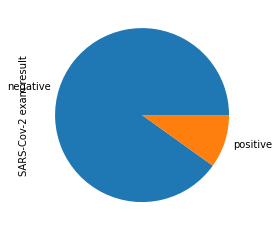

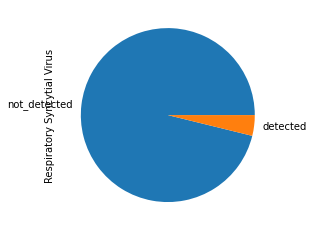

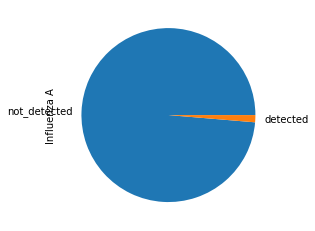

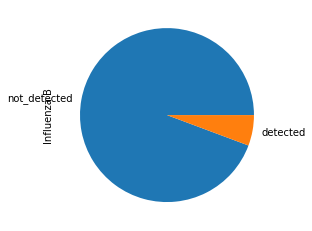

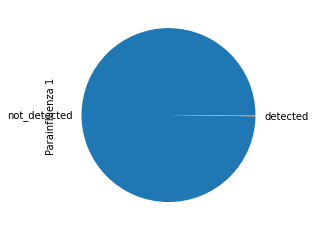

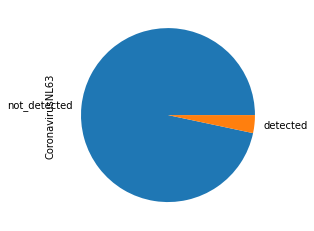

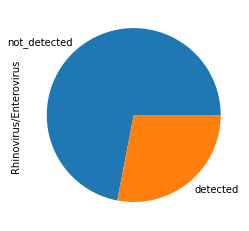

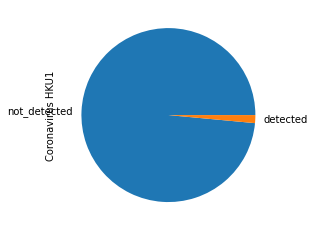

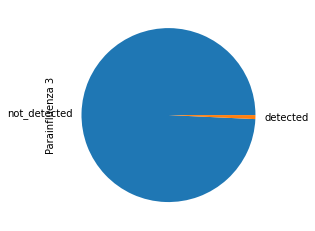

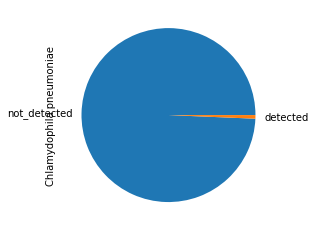

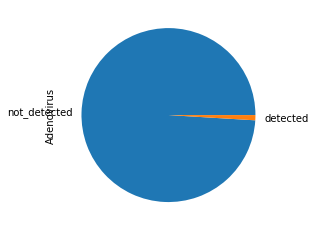

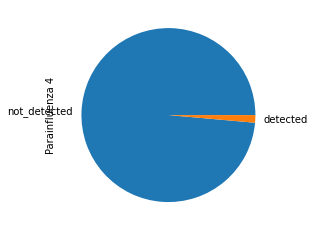

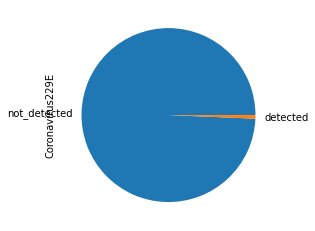

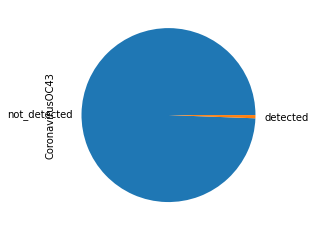

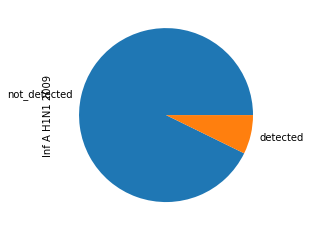

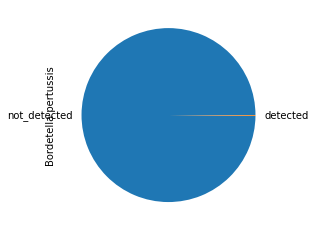

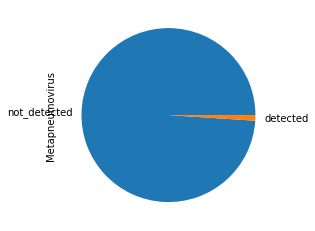

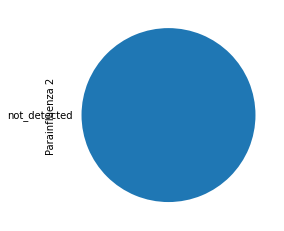

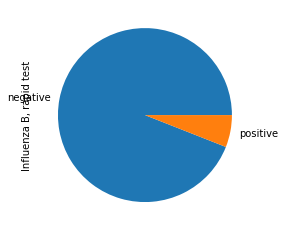

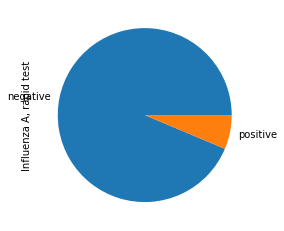

In [55]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

**Analyse :**
- les variables sont toutes binaires
- Virale
- Rhinovirus semble élevée

## Relation Target | Variables 

Nous avons ici des invidues positif et négatifs, il nous font donc créer des sous-ensembles avec ses 2 groupes pour analyser leur relation à la *Target*

### Création de sous-ensembles positifs & négatifs

- Mini Df, ou l'on ne va selectionner que les lignes pour toutes les colonnes ou notre *Target* est Positive ou Négative

In [56]:
positif_df = df[df["SARS-Cov-2 exam result"] == "positive"]

In [57]:
negatif_df = df[df["SARS-Cov-2 exam result"] == "negative"]

In [59]:
positif_df.shape, negatif_df.shape

((558, 38), (5086, 38))

### Sous-ensemble Viral & Blood
Nous allons selectionner ces 2 ensembles grace a leur taux de NaN différents que nous avons observé plus haut

In [60]:
taux_nan = df.isna().sum() / df.shape[0]

In [61]:
blood_col = df.columns[(taux_nan < 0.9) & (taux_nan > 0.88)]

In [64]:
viral_col = df.columns[(taux_nan < 0.88) & (taux_nan > 0.75)]

**Analyse :**
- Une fois nos sous-ensembles définie nous sommes prêts à les comparer et confronter à la *Target* pour voir les relations


### Relation Variables Continue 'Blood' à la Target

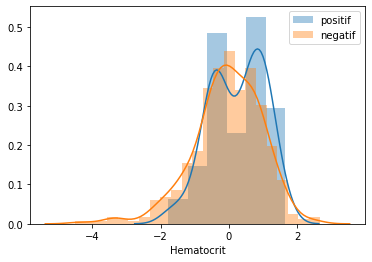

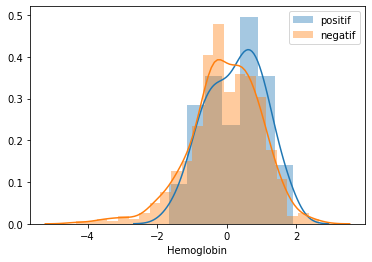

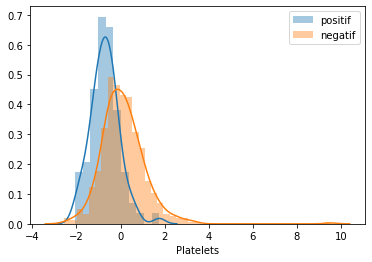

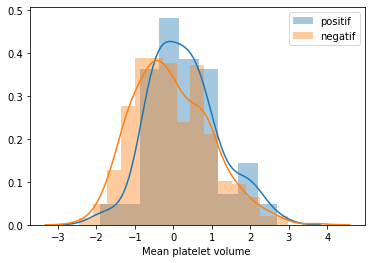

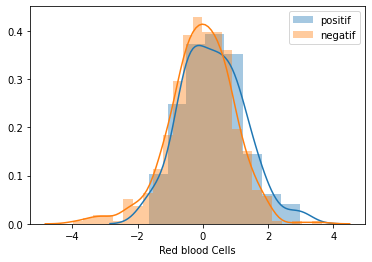

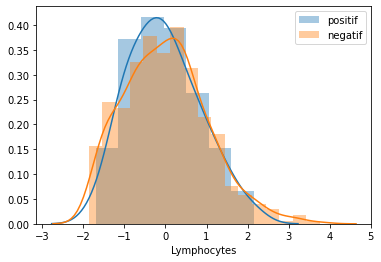

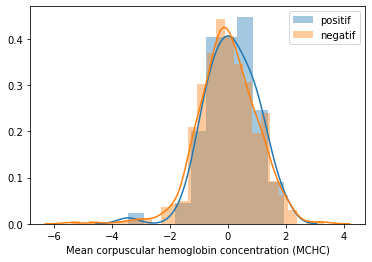

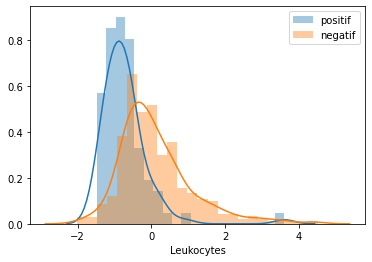

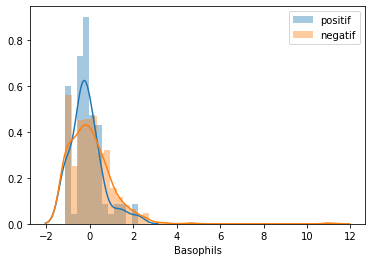

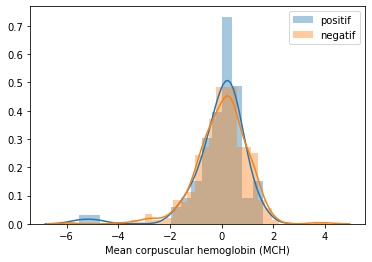

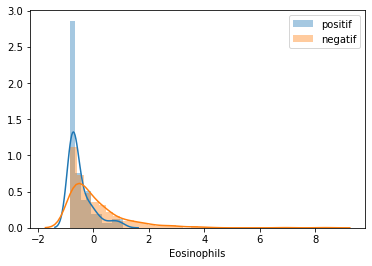

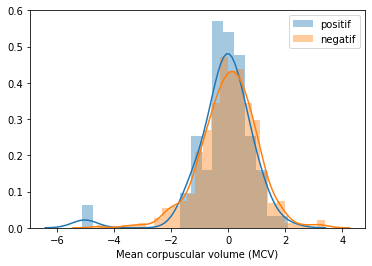

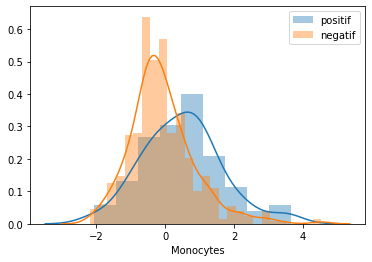

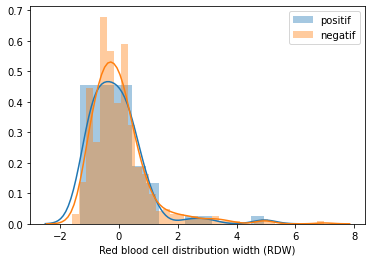

In [67]:
for col in blood_col:
    plt.figure()
    sns.distplot(positif_df[col], label='positif')
    sns.distplot(negatif_df[col], label='negatif')
    plt.legend()
    

### Relation variable contiue Age | Target

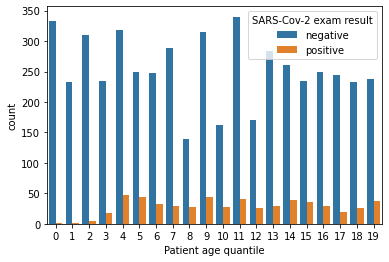

In [71]:
sns.countplot(x='Patient age quantile', 
              hue="SARS-Cov-2 exam result", data=df)

### Relation Variable Qualitative "Viral" à la Target
Notre Target est une Varb Quantitavie également, pour comparé 2 varb Quantitatives on peut utiliser `.crosstab()` 

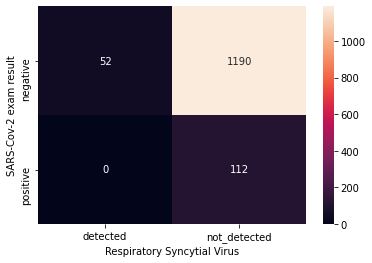

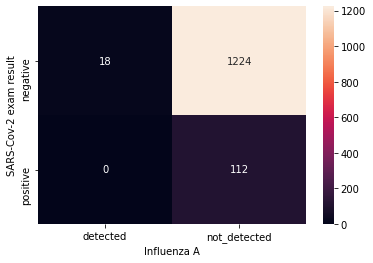

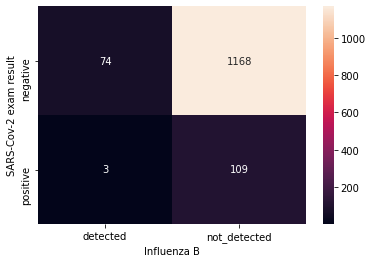

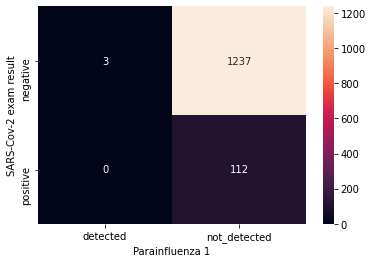

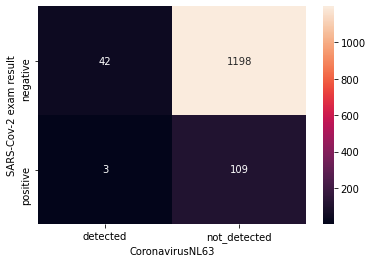

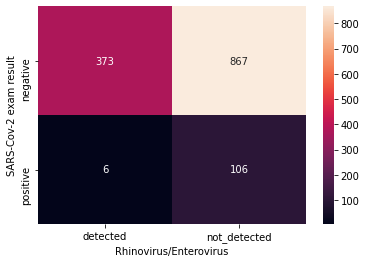

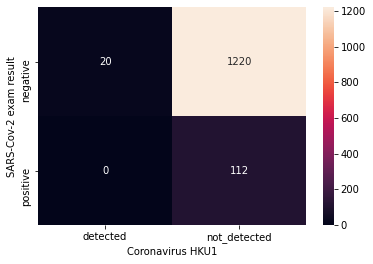

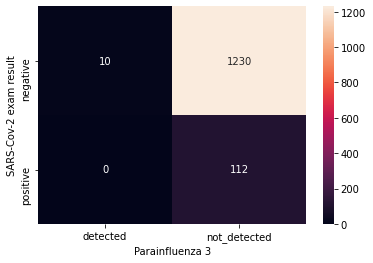

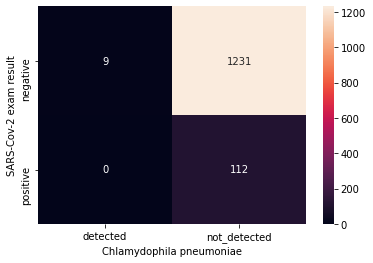

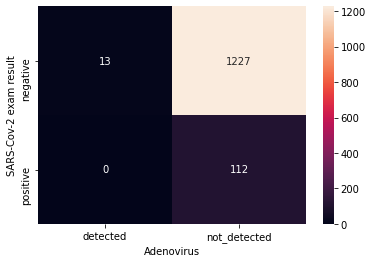

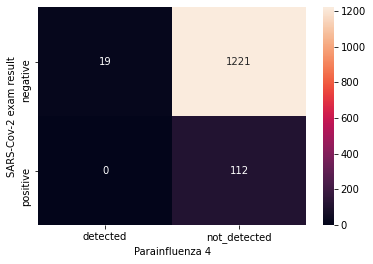

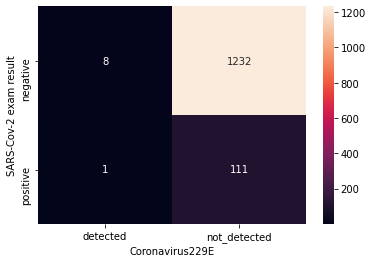

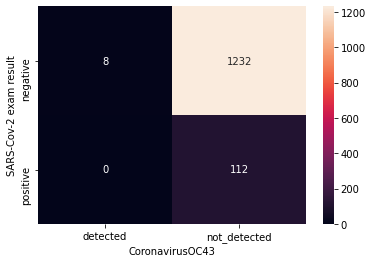

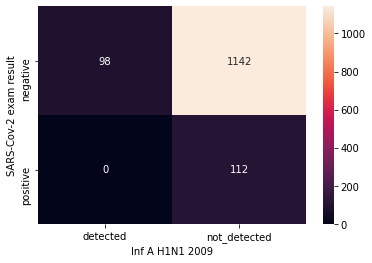

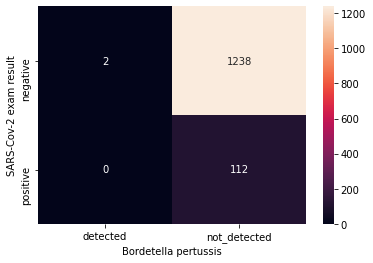

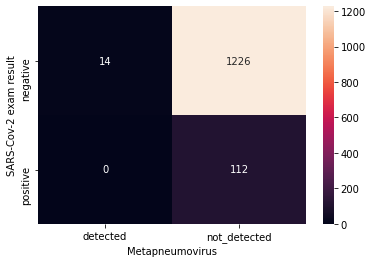

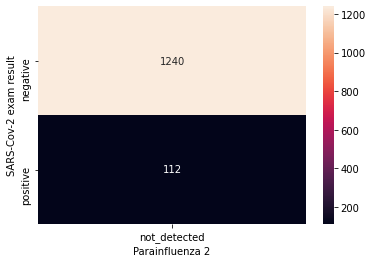

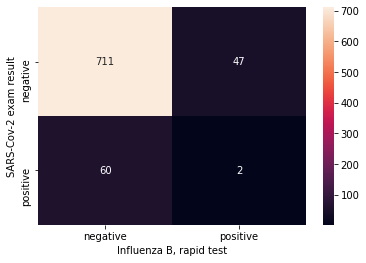

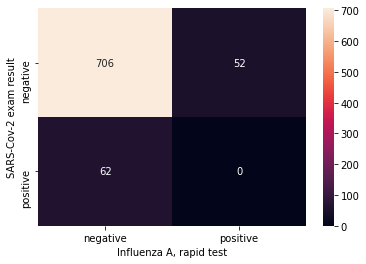

In [74]:
for col in viral_col:
    plt.figure()
    sns.heatmap(pd.crosstab(df["SARS-Cov-2 exam result"], 
                              df[col]), annot=True, fmt="d")

## Corrélation des variables

### Corrélation entre les variables de type Blood - Continue

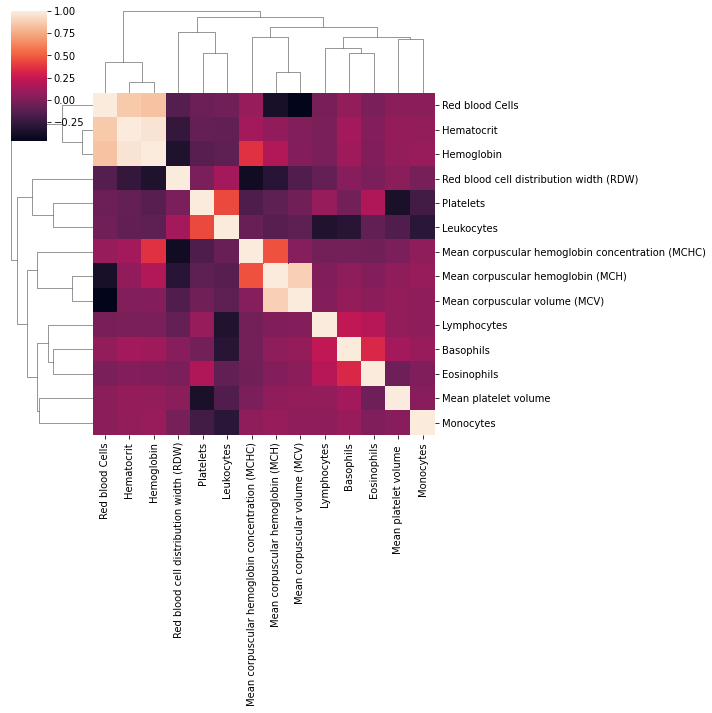

In [77]:
sns.clustermap(df[blood_col].corr())

### Relation Variables Qualitative Virale | Sanguin Quantitative

#### Création d'une nouvelle varible "est_malade"  

On vient mettre *True* dans une nouvelle colonne 'est_malade' si une personne est positive à au moins un test virale.

In [81]:
# On ne prend pas le 2 dernières col, inutile ici
df["est_malade"] = np.sum(df[viral_col[::-2]] == 'detected', axis=1) >= 1

In [82]:
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",est_malade
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,False
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,False


#### Création de mini Dataset pour tester "est_malade" ou non 

In [84]:
malade_df = df[df["est_malade"] == True]
non_malade_df = df[df["est_malade"] == False]

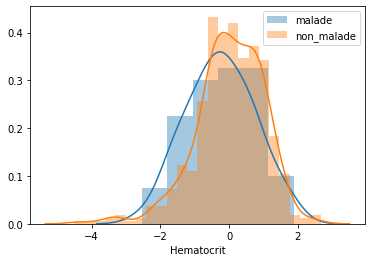

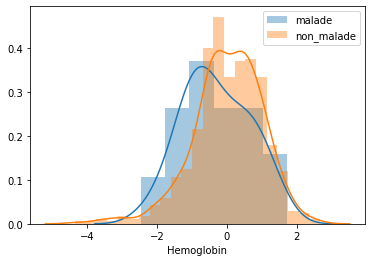

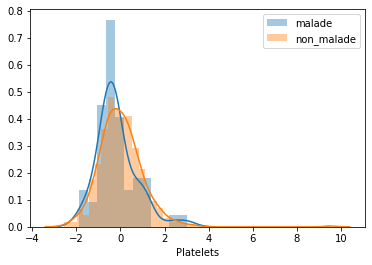

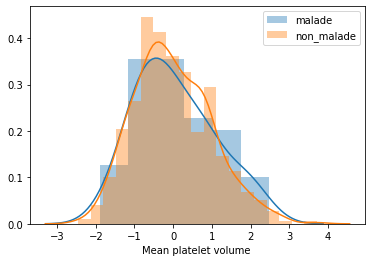

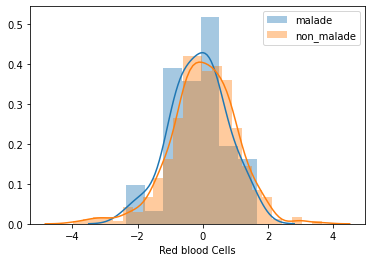

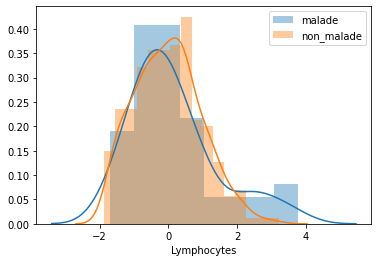

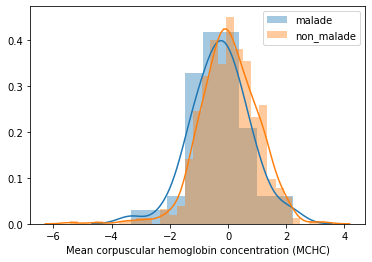

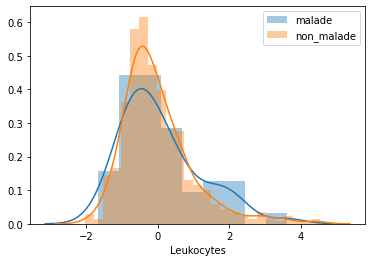

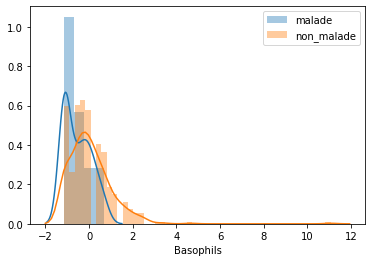

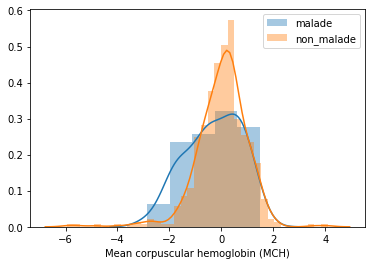

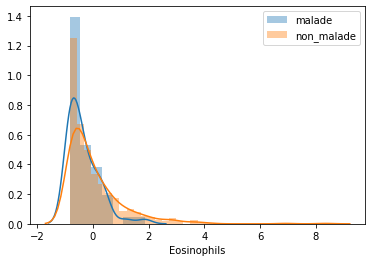

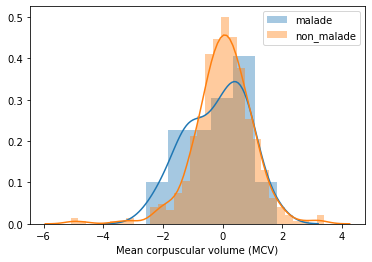

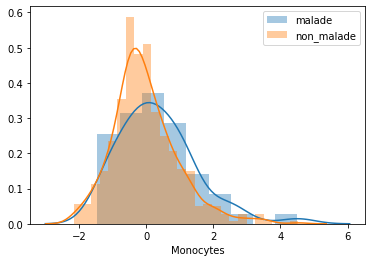

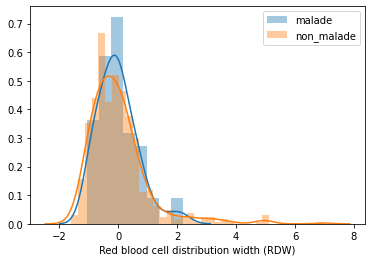

In [85]:
for col in blood_col:
    plt.figure()
    sns.distplot(malade_df[col], label='malade')
    sns.distplot(non_malade_df[col], label='non_malade')
    plt.legend()